In [4]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


# import libraries for model validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 

# import libraries for metrics and reporting
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
import statistics
import pandas as pd
import numpy as np

In [5]:
us = pd.read_csv('/content/drive/MyDrive/Data/US Presidential Data.csv')

In [6]:
us.head()

,Win/Loss,Optimism,Pessimism,PastUsed,FutureUsed,PresentUsed,OwnPartyCount,OppPartyCount,NumericContent,Extra,Emoti,Agree,Consc,Openn
0,1,0.104505,0.050450,0.438144,0.494845,0.067010,2,2,0.001878,4.041,4.049,3.469,2.450,2.548
1,1,0.114575,0.059236,0.291262,0.621359,0.087379,1,4,0.001419,3.446,3.633,3.528,2.402,2.831
2,1,0.112572,0.049302,0.415966,0.516807,0.067227,1,1,0.002131,3.463,4.039,3.284,2.159,2.465
3,1,0.107234,0.046320,0.463492,0.466667,0.069841,1,3,0.001872,4.195,4.661,4.007,2.801,3.067
4,1,0.105826,0.051724,0.334262,0.582173,0.083565,3,4,0.002229,4.658,4.023,3.283,2.415,2.836


In [7]:
print(us.columns)

Index(['Win/Loss', 'Optimism', 'Pessimism', 'PastUsed', 'FutureUsed',
       'PresentUsed', 'OwnPartyCount', 'OppPartyCount', 'NumericContent',
       'Extra', 'Emoti', 'Agree', 'Consc', 'Openn'],
      dtype='object')


In [8]:
us.dtypes

Win/Loss            int64
Optimism          float64
Pessimism         float64
PastUsed          float64
FutureUsed        float64
PresentUsed       float64
OwnPartyCount       int64
OppPartyCount       int64
NumericContent    float64
Extra             float64
Emoti             float64
Agree             float64
Consc             float64
Openn             float64
dtype: object

In [61]:
us.isnull().sum()

Win/Loss          0
Optimism          0
Pessimism         0
PastUsed          0
FutureUsed        0
PresentUsed       0
OwnPartyCount     0
OppPartyCount     0
NumericContent    0
Extra             0
Emoti             0
Agree             0
Consc             0
Openn             0
dtype: int64

In [10]:
feature_names = ['Optimism','Pessimism','PastUsed','FutureUsed','PresentUsed','OwnPartyCount','OppPartyCount','NumericContent','Extra','Emoti','Consc','Openn']
X = us[feature_names] 
y = us['Win/Loss']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify =us['Win/Loss'] , random_state=0,test_size = 0.30)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
y_pred = classifier.predict(X_test)

In [23]:
y_pred

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,

In [24]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[120  59]
 [ 42 237]]
              precision    recall  f1-score   support

           0       0.74      0.67      0.70       179
           1       0.80      0.85      0.82       279

    accuracy                           0.78       458
   macro avg       0.77      0.76      0.76       458
weighted avg       0.78      0.78      0.78       458



In [28]:
classifier.score(X_test, y_test)

0.7794759825327511

K-fold

In [42]:
knn_cv = KNeighborsClassifier(n_neighbors=5)

In [43]:
cv_scores = cross_val_score(knn_cv, X, y, cv=5)

In [44]:
print(cv_scores)

[0.58032787 0.54098361 0.61967213 0.73114754 0.64144737]


In [40]:
k_range = range(1, 26)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7554585152838428, 0.7445414847161572, 0.759825327510917, 0.7729257641921398, 0.7794759825327511, 0.777292576419214, 0.7620087336244541, 0.7685589519650655, 0.777292576419214, 0.7882096069868996, 0.7532751091703057, 0.7663755458515283, 0.7641921397379913, 0.7685589519650655, 0.7663755458515283, 0.7663755458515283, 0.759825327510917, 0.75764192139738, 0.7489082969432315, 0.7620087336244541, 0.7510917030567685, 0.75764192139738, 0.7620087336244541, 0.7685589519650655, 0.7641921397379913]


In [41]:
# best k value is 5 in KNN.

In [50]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

linked = linkage(us, 'single')
plt.show()

In [51]:
linked

array([[8.04000000e+02, 8.07000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.09200000e+03, 1.09600000e+03, 1.24106229e-02, 2.00000000e+00],
       [4.94000000e+02, 4.95000000e+02, 4.61233997e-02, 2.00000000e+00],
       ...,
       [4.54000000e+02, 3.04300000e+03, 1.54286726e+01, 1.52200000e+03],
       [3.96000000e+02, 3.04400000e+03, 1.77448420e+01, 1.52300000e+03],
       [5.53000000e+02, 3.04500000e+03, 2.15519912e+01, 1.52400000e+03]])

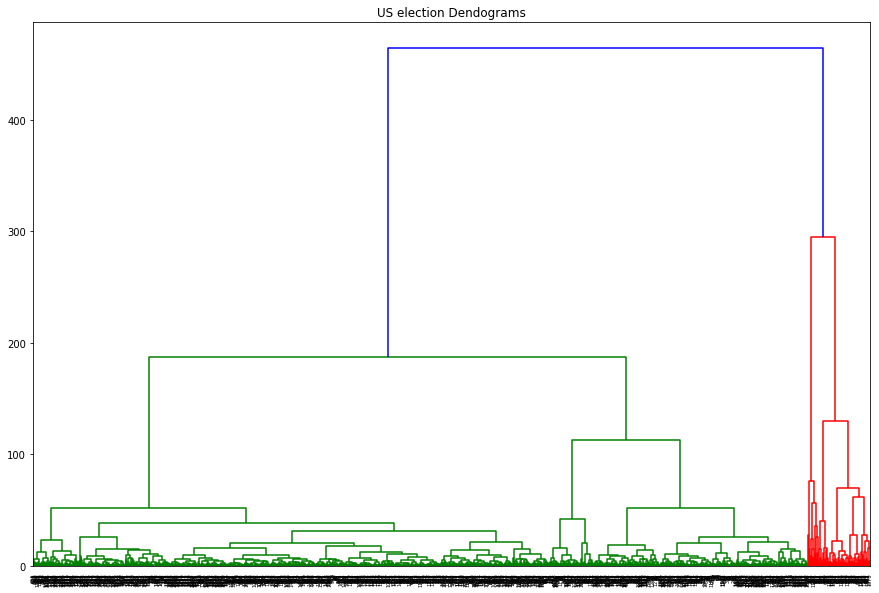

In [54]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 10))
plt.title("US election Dendograms")
dend = shc.dendrogram(shc.linkage(us, method='ward'))